**Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.**

Data Description:
Murder -- Murder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


**Hierarchical Clustering**

A Hierarchical clustering method works via grouping data into a tree of clusters.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:
df=pd.read_csv("crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
#Normalise data function

def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [7]:
#Normalise Data frame
df_nor=norm_func(df.iloc[:,1:])

In [8]:
from sklearn.preprocessing import MinMaxScaler

trans=MinMaxScaler()
df1=pd.DataFrame(trans.fit_transform(df.iloc[:,1:]))
df1

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [9]:
df_nor

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


A dendrogram is a diagram that shows the hierarchical relationship between objects

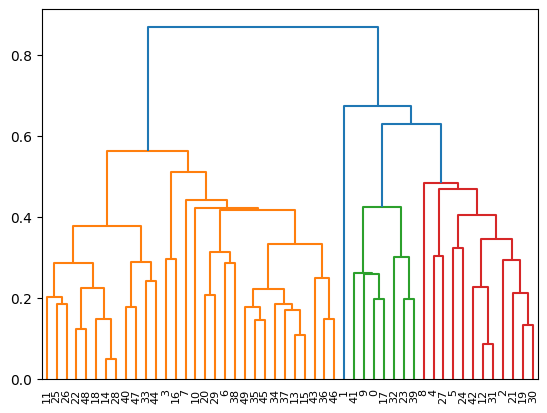

In [10]:
#create Dendrogram

dend=sch.dendrogram(sch.linkage(df_nor,method="average"))

In [11]:
#create Clusters

h_c = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")

In [12]:
y_hc=h_c.fit_predict(df_nor)
clusters = pd.DataFrame(y_hc,columns=["Clusters"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [13]:
df_nor["h_clusterid"]=clusters

In [14]:
df_nor.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
29,0.397590,0.390411,0.966102,0.297158,0
16,0.536145,0.219178,0.338983,0.232558,0
15,0.313253,0.239726,0.576271,0.276486,0
34,0.391566,0.256849,0.728814,0.364341,0
13,0.385542,0.232877,0.559322,0.354005,0
35,0.349398,0.363014,0.610169,0.328165,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0
10,0.271084,0.003425,0.864407,0.333333,0


In [15]:
df_nor.iloc[:,1:].groupby(df_nor.h_clusterid).mean()

,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,
0,0.325533,0.666667,0.294143,0.0
1,0.725742,0.785311,0.644703,1.0
2,0.746575,0.271186,0.961240,2.0
3,0.706458,0.377724,0.371724,3.0
4,0.106164,0.340395,0.117140,4.0


In [16]:
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average").fit(df_nor)
cluster_labels = pd.Series(hc.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [17]:
df["clus"]=cluster_labels
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clus
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [18]:
df.iloc[:,1:].groupby(df.clus).mean()

,Murder,Assault,UrbanPop,Rape,clus
clus,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.0
1,10.883333,256.916667,78.333333,32.250000,1.0
2,3.091667,76.000000,52.083333,11.833333,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,10.000000,263.000000,48.000000,44.500000,4.0


**K_Means Clustering**

k-means clustering tries to group similar kinds of items in form of clusters

In [19]:
from sklearn.cluster import KMeans

In [20]:
#Normalising

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.56623161],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  2.44613701],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.19357919],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.07348459],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.19357919],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.19357919],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.07348459],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.07348459],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.19357919],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.56623161],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.07348459],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.68632621],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.19357919],
       [-0.13637203, -0.70012057, -0.0

In [21]:
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
  if i>5:
    break
wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[250.0,
 144.71852383579727,
 97.75436228529935,
 60.572341761559734,
 51.914235293507886,
 44.726424511904]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

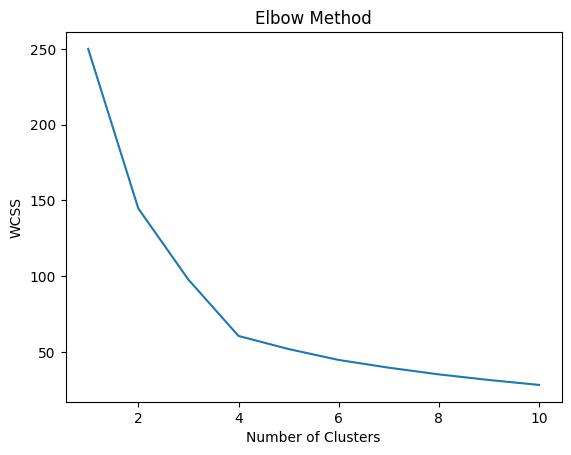

In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
#Build Cluster Aalgorithm

Clusters_new=KMeans(n_clusters=4,random_state=16)
Clusters_new.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=16)

In [24]:
Clusters_new.labels_

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 3, 1], dtype=int32)

In [25]:
# Assign clusters to data set

df["n_clusterid"]=Clusters_new.labels_
Clusters_new.cluster_centers_

array([[ 1.4610129 ,  0.99381728, -0.84023734,  0.35649393,  1.67621978],
       [-0.40179755, -0.37217475,  0.40430025, -0.27487043, -1.07348459],
       [ 0.71788585,  1.04432228,  0.89281033,  1.18827715, -0.19357919],
       [-1.08919812, -1.14860501, -0.93910247, -1.01363413,  0.68632621]])

In [26]:
df.groupby("n_clusterid").agg(["mean"]).reset_index()

<ipython-input-26-a90273dcbfec>:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("n_clusterid").agg(["mean"]).reset_index()


,n_clusterid,Murder,Assault,UrbanPop,Rape,clus
,,mean,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.537500,3.125
1,1,6.055556,140.055556,71.333333,18.683333,0.000
2,2,10.883333,256.916667,78.333333,32.250000,1.000
3,3,3.091667,76.000000,52.083333,11.833333,2.000


In [27]:
df[df["n_clusterid"]==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clus,n_clusterid
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,4,0
9,Georgia,17.4,211,60,25.8,3,0
17,Louisiana,15.4,249,66,22.2,3,0
23,Mississippi,16.1,259,44,17.1,3,0
32,North Carolina,13.0,337,45,16.1,3,0
39,South Carolina,14.4,279,48,22.5,3,0
41,Tennessee,13.2,188,59,26.9,3,0


**DBSCAN CLUSTERING**

**Density-based spatial clustering of applications with noise**(DBSCAN)

An algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.

In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [29]:
#Dropping unnamed data for Easy clustering
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [30]:
arr=df.values
arr

array([[ 13.2, 236. ,  58. ,  21.2,   3. ,   0. ],
       [ 10. , 263. ,  48. ,  44.5,   4. ,   0. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   1. ],
       [  9. , 276. ,  91. ,  40.6,   1. ,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   1. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   3. ,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   1. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   3. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   3. ,   0. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   3. ],
       [ 11.3, 300. ,  67. ,  2

In [31]:
#Normalising

sc=StandardScaler().fit(arr)
scaled_df=sc.transform(arr)
scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.56623161,
        -1.52502068],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  2.44613701,
        -1.52502068],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.19357919,
         0.43013404],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.07348459,
        -0.54744332],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.19357919,
         0.43013404],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.19357919,
         0.43013404],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.07348459,
        -0.54744332],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.07348459,
        -0.54744332],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.19357919,
         0.43013404],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.56623161,
        -1.52502068],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [32]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

neighbors = NearestNeighbors(n_neighbors=6)
fitneighbors = neighbors.fit(scaled_df)
distances, indices = fitneighbors.kneighbors(scaled_df)

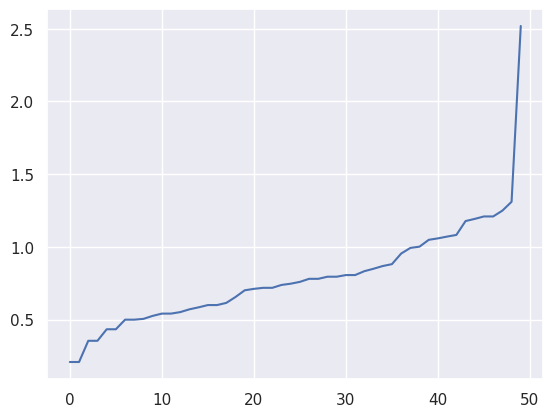

In [33]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [34]:
#Building Model

dbscan=DBSCAN(eps=1.2,min_samples=4)
dbscan.fit(scaled_df)

DBSCAN(eps=1.2, min_samples=4)

In [35]:
dbscan.labels_

array([ 0, -1,  1,  2, -1, -1,  2,  2, -1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  3,  0,  1,  3,  3, -1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  3,  2])

In [36]:
cl=pd.DataFrame(dbscan.labels_,columns=["Clsuters"])
cl

,Clsuters
0,0
1,-1
2,1
3,2
4,-1
5,-1
6,2
7,2
8,-1
9,0


In [37]:
import sklearn
sklearn.metrics.silhouette_score(scaled_df,dbscan.labels_)

0.4482224209785002

In [38]:
pd.concat([df,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,clus,n_clusterid,Clsuters
0,13.2,236,58,21.2,3,0,0
1,10.0,263,48,44.5,4,0,-1
2,8.1,294,80,31.0,1,2,1
3,8.8,190,50,19.5,0,1,2
4,9.0,276,91,40.6,1,2,-1
5,7.9,204,78,38.7,1,2,-1
6,3.3,110,77,11.1,0,1,2
7,5.9,238,72,15.8,0,1,2
8,15.4,335,80,31.9,1,2,-1
9,17.4,211,60,25.8,3,0,0


**Analysation using Scatterplot**

In [39]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_nor)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
y_kmeans

array([3, 3, 0, 2, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 2, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [41]:
y_kmeans1=y_kmeans+1
cluster=list(y_kmeans1)

In [42]:
df['cluster']=cluster

In [43]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape,clus,n_clusterid
cluster,,,,,,
1,10.9,256.9,78.3,32.2,1.0,2.0
2,3.1,76.0,52.1,11.8,2.0,3.0
3,6.1,140.1,71.3,18.7,0.0,1.0
4,14.1,252.8,53.5,24.5,3.1,0.0


<Axes: xlabel='Murder', ylabel='Assault'>

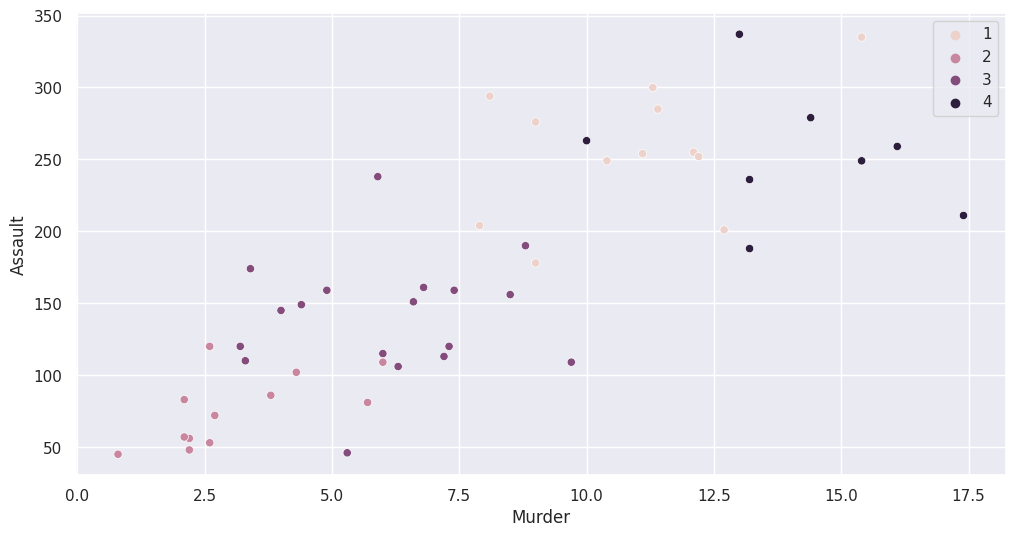

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Assault'],hue=y_kmeans1)

<Axes: xlabel='Murder', ylabel='Rape'>

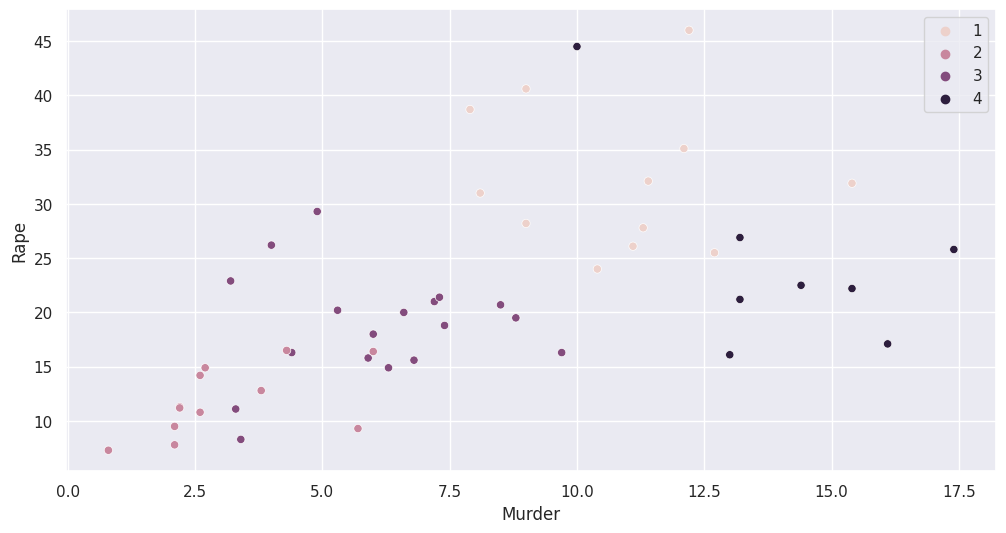

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y = df['Rape'],hue=y_kmeans1)

<Axes: xlabel='Rape', ylabel='Assault'>

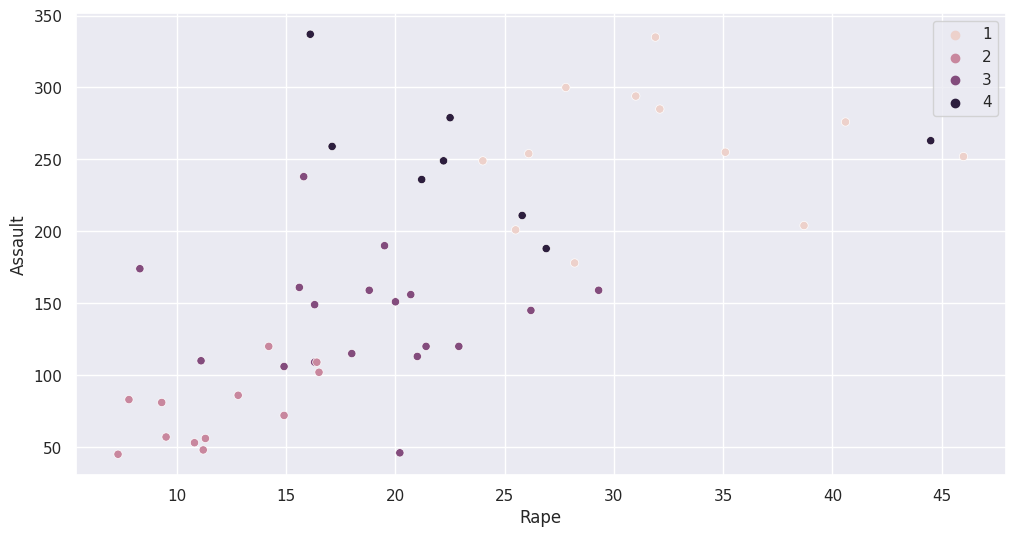

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Rape'], y = df['Assault'],hue=y_kmeans1)

In [47]:
df.loc[:,'Total'] = df.sum(numeric_only=True, axis=1)
stats = df.sort_values("Total", ascending=True)
df_total= pd.DataFrame(stats)

In [48]:
df_total.head()

,Murder,Assault,UrbanPop,Rape,clus,n_clusterid,cluster,Total
44,2.2,48,32,11.2,2,3,2,100.4
33,0.8,45,44,7.3,2,3,2,104.1
28,2.1,57,56,9.5,2,3,2,131.6
14,2.2,56,57,11.3,2,3,2,133.5
48,2.6,53,66,10.8,2,3,2,139.4


**Conclusion**

Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

There is a clear correlation with rape and assault in city along murder and assaults(more cluster spread can be seen in murder and rape columns)